In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
#import shap

## Lectura de Datasets

### Academico Dataset

In [206]:
dataset = 'academico_'
file = f'../data/{dataset}.csv'
df_academico = pd.read_csv(file)

C:\Users\jange\AppData\Local\Temp\ipykernel_95044\3250444663.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_academico = pd.read_csv(file)


In [207]:
df_academico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93063 entries, 0 to 93062
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AÑO                    93063 non-null  int64 
 1   region_ie              93063 non-null  object
 2   provincia_ie           93063 non-null  object
 3   ugel_ie                93063 non-null  object
 4   distrito_ie            93063 non-null  object
 5   centropoblado_ie       93063 non-null  object
 6   institucion_educativa  93063 non-null  object
 7   codigolocal_ie         93063 non-null  int64 
 8   codigomodular_ie       93063 non-null  int64 
 9   ruralidad              93063 non-null  object
 10  estudiantes            93063 non-null  object
 11  grado                  93063 non-null  object
 12  periodo                93063 non-null  object
 13  curso                  93063 non-null  object
 14  comp                   93063 non-null  object
 15  nivel_de_logro     

In [208]:
df_academico_columns = df_academico.columns
df_academico_columns

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'estudiantes', 'grado', 'periodo',
       'curso', 'comp', 'nivel_de_logro', 'dni_participante',
       'id_participante', 'participante', 'coordinador_a', 'programa',
       'año_pdl', 'socios'],
      dtype='object')

In [209]:
df_academico_ID_Participante = df_academico['id_participante'].unique()
print(len(df_academico_ID_Participante))

687


### Clima de Aula Dataset

In [210]:
dataset = 'clima_aula_'
file = f'../data/{dataset}.csv'
df_clima_aula = pd.read_csv(file)

In [211]:
df_clima_aula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AÑO                    13200 non-null  int64 
 1   region_ie              13200 non-null  object
 2   provincia_ie           13200 non-null  object
 3   ugel_ie                13200 non-null  object
 4   distrito_ie            13200 non-null  object
 5   centropoblado_ie       13200 non-null  object
 6   institucion_educativa  13200 non-null  object
 7   codigolocal_ie         13200 non-null  int64 
 8   codigomodular_ie       13200 non-null  int64 
 9   ruralidad              13200 non-null  object
 10  grado                  13200 non-null  object
 11  periodo                13200 non-null  object
 12  evaluacion             13200 non-null  object
 13  elemento               13200 non-null  object
 14  porcentaje_positivas   13175 non-null  object
 15  nivel_de_logro     

In [212]:
df_clima_aula_columns = df_clima_aula.columns
df_clima_aula_columns

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'grado', 'periodo', 'evaluacion',
       'elemento', 'porcentaje_positivas', 'nivel_de_logro',
       'dni_participante', 'id_participante', 'participante', 'coordinador_a',
       'programa', 'año_pdl', 'socios'],
      dtype='object')

In [213]:
df_clima_aula_ID_Participante = df_clima_aula['id_participante'].unique()
print(len(df_clima_aula_ID_Participante))

449


### Socio-emocional Dataset

In [214]:
dataset = 'socioemocional_'
file = f'../data/{dataset}.csv'
df_socioemocional = pd.read_csv(file)

C:\Users\jange\AppData\Local\Temp\ipykernel_95044\3190278524.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_socioemocional = pd.read_csv(file)


In [215]:
df_socioemocional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341245 entries, 0 to 341244
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AÑO                    341245 non-null  int64  
 1   region_ie              341245 non-null  object 
 2   provincia_ie           341245 non-null  object 
 3   ugel_ie                341245 non-null  object 
 4   distrito_ie            341245 non-null  object 
 5   centropoblado_ie       341245 non-null  object 
 6   institucion_educativa  341245 non-null  object 
 7   codigolocal_ie         341245 non-null  int64  
 8   codigomodular_ie       341245 non-null  int64  
 9   ruralidad              341245 non-null  object 
 10  id_estudiante          341245 non-null  object 
 11  grado                  341245 non-null  object 
 12  periodo                341245 non-null  object 
 13  evaluación             341245 non-null  object 
 14  habilidad              341245 non-nu

In [216]:
df_socioemocional_columns = df_socioemocional.columns
df_socioemocional_columns

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'id_estudiante', 'grado', 'periodo',
       'evaluación', 'habilidad', 'promedio', 'nivel_de_logro',
       'dni_participante', 'id_participante', 'participantes_sección',
       'coordinador_a', 'programa', 'año_pdl', 'socios'],
      dtype='object')

In [217]:
df_socioemocional_ID_Participante = df_socioemocional['id_participante'].unique()
print(len(df_socioemocional_ID_Participante))

450


## Agrupamiento y Transformación de Datos

ACADEMICO - Eliminar registros con valores nulos en esos 3 Primary keys

In [218]:
df_academico.isnull().sum()

AÑO                         0
region_ie                   0
provincia_ie                0
ugel_ie                     0
distrito_ie                 0
centropoblado_ie            0
institucion_educativa       0
codigolocal_ie              0
codigomodular_ie            0
ruralidad                   0
estudiantes                 0
grado                       0
periodo                     0
curso                       0
comp                        0
nivel_de_logro              0
dni_participante           64
id_participante             0
participante                0
coordinador_a               0
programa                    0
año_pdl                     0
socios                   7668
dtype: int64

In [219]:
df_socioemocional.isnull().sum()

AÑO                       0
region_ie                 0
provincia_ie              0
ugel_ie                   0
distrito_ie               0
centropoblado_ie          0
institucion_educativa     0
codigolocal_ie            0
codigomodular_ie          0
ruralidad                 0
id_estudiante             0
grado                     0
periodo                   0
evaluación                0
habilidad                 0
promedio                  0
nivel_de_logro            0
dni_participante         38
id_participante           0
participantes_sección     0
coordinador_a             0
programa                  0
año_pdl                   0
socios                    0
dtype: int64

In [220]:
df_clima_aula.isnull().sum()

AÑO                       0
region_ie                 0
provincia_ie              0
ugel_ie                   0
distrito_ie               0
centropoblado_ie          0
institucion_educativa     0
codigolocal_ie            0
codigomodular_ie          0
ruralidad                 0
grado                     0
periodo                   0
evaluacion                0
elemento                  0
porcentaje_positivas     25
nivel_de_logro            0
dni_participante         14
id_participante           0
participante              0
coordinador_a             0
programa                  0
año_pdl                   0
socios                    0
dtype: int64

In [221]:
columns_to_check = ["codigomodular_ie", "grado", "id_participante"]
cleaned_df_aca = df_academico.dropna(subset=columns_to_check)
cleaned_df_aca.id_participante.nunique()

687

In [222]:
cleaned_df_aca.columns

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'estudiantes', 'grado', 'periodo',
       'curso', 'comp', 'nivel_de_logro', 'dni_participante',
       'id_participante', 'participante', 'coordinador_a', 'programa',
       'año_pdl', 'socios'],
      dtype='object')

ACADEMICO - Agrupar por las siguientes columnas y tomar la moda de la variable `Nivel de logro`

In [223]:
group_cols = ['region_ie', 'provincia_ie ', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie','codigolocal_ie',
       'codigomodular_ie', 'grado', 'periodo','id_participante']

In [224]:
# Asegurar que los nombres de columnas en group_cols existan en el DataFrame
group_cols = [col.strip() for col in group_cols]  # Elimina espacios extra

# Verificar nombres reales de columnas en cleaned_df_aca
print(cleaned_df_aca.columns)

# Renombrar columnas eliminando espacios extra si existen
cleaned_df_aca.columns = cleaned_df_aca.columns.str.strip()

Index(['AÑO', 'region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'institucion_educativa', 'codigolocal_ie',
       'codigomodular_ie', 'ruralidad', 'estudiantes', 'grado', 'periodo',
       'curso', 'comp', 'nivel_de_logro', 'dni_participante',
       'id_participante', 'participante', 'coordinador_a', 'programa',
       'año_pdl', 'socios'],
      dtype='object')


In [225]:
# Aplicar el groupby
if "nivel_de_logro" in cleaned_df_aca.columns:
    result_aca = cleaned_df_aca.groupby(group_cols)["nivel_de_logro"].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else None
    ).reset_index()
    print(result_aca)
else:
    print("Error: La columna 'nivel_de_logro' no existe en el DataFrame.")

     region_ie provincia_ie           ugel_ie   distrito_ie  \
0     AMAZONAS        BAGUA   UGEL IBIR-IMAZA         IMAZA   
1     AMAZONAS        BAGUA   UGEL IBIR-IMAZA         IMAZA   
2     AMAZONAS        BAGUA   UGEL IBIR-IMAZA         IMAZA   
3     AMAZONAS        BAGUA   UGEL IBIR-IMAZA         IMAZA   
4     AMAZONAS        BAGUA   UGEL IBIR-IMAZA         IMAZA   
...        ...          ...               ...           ...   
1497     PIURA        PIURA  UGEL TAMBOGRANDE  TAMBO GRANDE   
1498     PIURA        PIURA  UGEL TAMBOGRANDE  TAMBO GRANDE   
1499     PIURA        PIURA  UGEL TAMBOGRANDE  TAMBO GRANDE   
1500     PIURA        PIURA  UGEL TAMBOGRANDE  TAMBO GRANDE   
1501     PIURA        PIURA  UGEL TAMBOGRANDE  TAMBO GRANDE   

         centropoblado_ie  codigolocal_ie  codigomodular_ie     grado  \
0                BICHANAK            4178            270363  Primaria   
1                BICHANAK            4178            270363  Primaria   
2                   CHAP

In [226]:
result_aca

,region_ie,provincia_ie,ugel_ie,distrito_ie,centropoblado_ie,codigolocal_ie,codigomodular_ie,grado,periodo,id_participante,nivel_de_logro
0,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,BICHANAK,4178,270363,Primaria,Diciembre 2024,3a4fbc85-6818-4337-9e42-7b5c27bc432a,En inicio
1,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,BICHANAK,4178,270363,Primaria,Marzo 2024,3a4fbc85-6818-4337-9e42-7b5c27bc432a,En inicio
2,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHAPI,4692,917898,Primaria,Diciembre 2024,36d87d12-f6f0-44ed-8be9-54334d91fea9,En inicio
3,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHAPI,4692,917898,Primaria,Marzo 2024,36d87d12-f6f0-44ed-8be9-54334d91fea9,En inicio
4,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHAPI,4692,917898,Primaria,Marzo 2024,e71d7354-6a2d-4102-a323-df751e484ed0,En inicio
...,...,...,...,...,...,...,...,...,...,...,...
1497,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,SAN MIGUEL DE SEREN,416462,350660,Primaria,Marzo 2024,e20a6064-1bcd-4a9c-8a7b-75addf22g901,En inicio
1498,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Diciembre 2024,2f1d770e-d09d-40f5-b920-608b90f64d9d,Satisfactorio
1499,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Diciembre 2024,dfd463e3-a45d-4a28-a442-f08728ea466a,En inicio
1500,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Marzo 2024,2f1d770e-d09d-40f5-b920-608b90f64d9d,En proceso


SOCIOEMOCIONAL - Eliminar registros con valores nulos en esos 3 Primary keys

In [227]:
columns_to_check = ["codigomodular_ie", "grado", "id_participante"]
cleaned_df_soc = df_socioemocional.dropna(subset=columns_to_check)
cleaned_df_soc.id_participante.nunique()

450

In [228]:
cleaned_df_soc[cleaned_df_soc.periodo == "Marzo 2023"].habilidad.value_counts()

habilidad
Autocuidado                                       3223
Autoestima                                        3058
Conciencia emocional                              2492
Comunicación asertiva                             2242
Trabajo en equipo                                 2241
Toma de decisiones responsables                   2240
Regulación emocional                              2238
Resolución de conflictos                          2237
Conciencia social                                 2236
Empatía                                           2233
Comportamiento prosocial                          2233
Autoconcepto                                      2192
Limitados recursos económicos                     1478
Limitada expectativa sobre la educación           1477
Violencia escolar                                 1476
Violencia familiar                                1476
Consumo de alcohol y drogas                       1475
Desinformación sobre educación sexual integral    1475


SOCIOEMOCIONAL - Agrupar por las columnas anteriores, transformar por Habilidad y tomar la moda de la variable `Nivel de logro` por cada Habilidad

In [229]:
result = cleaned_df_soc.pivot_table(
    index=group_cols,
    columns="habilidad",
    values="nivel_de_logro",
    aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

In [230]:
result.columns.name = None
result = result.rename_axis(None, axis=1)
result

,region_ie,provincia_ie,ugel_ie,distrito_ie,centropoblado_ie,codigolocal_ie,codigomodular_ie,grado,periodo,id_participante,...,Limitados recursos económicos,Percepción sobre estereotipos de género,Regulación emocional,Resolución de conflictos,Toma de decisiones responsables,Trabajo adolescente,Trabajo en equipo,Violencia de género,Violencia escolar,Violencia familiar
0,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,BICHANAK,4178,270363,Primaria,Diciembre 2024,3a4fbc85-6818-4337-9e42-7b5c27bc432a,...,NaN,NaN,En inicio,En proceso,En inicio,NaN,En proceso,NaN,NaN,NaN
1,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHAPI,4692,917898,Primaria,Diciembre 2024,36d87d12-f6f0-44ed-8be9-54334d91fea9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,3800,402271,Primaria,Diciembre 2024,5de9d227-8762-4638-a688-65d357041001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Diciembre 2023,0172d360,...,Riesgo Moderado,NaN,En proceso,En proceso,Satisfactorio,Riesgo Moderado,En proceso,Riesgo Moderado,Riesgo Moderado,Riesgo Moderado
4,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Diciembre 2023,b29b6a82,...,Riesgo Moderado,En proceso,Satisfactorio,Satisfactorio,Satisfactorio,Riesgo Moderado,Satisfactorio,Riesgo Moderado,Riesgo Moderado,Riesgo Moderado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,SAN MIGUEL DE SEREN,416462,350660,Primaria,Marzo 2024,f15a6064-3aaa-4a9c-8a7b-74aeec155e92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Diciembre 2024,2f1d770e-d09d-40f5-b920-608b90f64d9d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Diciembre 2024,dfd463e3-a45d-4a28-a442-f08728ea466a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Marzo 2024,2f1d770e-d09d-40f5-b920-608b90f64d9d,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CLIMA DE AULA - Eliminar registros con valores nulos en esos 3 Primary keys

In [231]:
columns_to_check = ["codigomodular_ie", "grado", "id_participante"]
cleaned_df_cli = df_clima_aula.dropna(subset=columns_to_check)
cleaned_df_cli.id_participante.nunique()

449

In [232]:
cleaned_df_cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AÑO                    13200 non-null  int64 
 1   region_ie              13200 non-null  object
 2   provincia_ie           13200 non-null  object
 3   ugel_ie                13200 non-null  object
 4   distrito_ie            13200 non-null  object
 5   centropoblado_ie       13200 non-null  object
 6   institucion_educativa  13200 non-null  object
 7   codigolocal_ie         13200 non-null  int64 
 8   codigomodular_ie       13200 non-null  int64 
 9   ruralidad              13200 non-null  object
 10  grado                  13200 non-null  object
 11  periodo                13200 non-null  object
 12  evaluacion             13200 non-null  object
 13  elemento               13200 non-null  object
 14  porcentaje_positivas   13175 non-null  object
 15  nivel_de_logro     

CLIMA DE AULA - Agrupar por las columnas anteriores, transformar por Elemento y tomar la moda de la variable `Nivel de logro` por cada Elemento

In [233]:
result_cli = cleaned_df_cli.pivot_table(
    index=group_cols,
    columns="elemento",
    values="nivel_de_logro",
    aggfunc=lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

In [234]:
result_cli.columns.name = None
result_cli = result_cli.rename_axis(None, axis=1)
result_cli

,region_ie,provincia_ie,ugel_ie,distrito_ie,centropoblado_ie,codigolocal_ie,codigomodular_ie,grado,periodo,id_participante,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes
0,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHAPI,4692,917898,Primaria,Diciembre 2024,36d87d12-f6f0-44ed-8be9-54334d91fea9,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,En proceso,En proceso,En proceso
1,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Diciembre 2023,0172d360,En proceso,Satisfactorio,Satisfactorio,En inicio,En proceso,Satisfactorio,Satisfactorio
2,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Diciembre 2023,b29b6a82,En proceso,Satisfactorio,Satisfactorio,En inicio,En proceso,En proceso,En proceso
3,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Diciembre 2024,b29b378a2024,En inicio,En proceso,En inicio,En inicio,En proceso,En inicio,En inicio
4,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Julio 2023,0172d360,Satisfactorio,En proceso,Satisfactorio,En inicio,En proceso,En proceso,En proceso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,SAN MIGUEL DE SEREN,416462,350660,Primaria,Marzo 2024,b29b6c112024,En proceso,En proceso,Satisfactorio,En proceso,En proceso,Satisfactorio,Satisfactorio
1182,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Diciembre 2024,2f1d770e-d09d-40f5-b920-608b90f64d9d,Satisfactorio,Satisfactorio,En proceso,En proceso,En proceso,Satisfactorio,En proceso
1183,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Diciembre 2024,dfd463e3-a45d-4a28-a442-f08728ea466a,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,En proceso,Satisfactorio,Satisfactorio
1184,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Marzo 2024,2f1d770e-d09d-40f5-b920-608b90f64d9d,En inicio,En proceso,En proceso,En inicio,En proceso,En proceso,En proceso


In [235]:
result_cli.isnull().sum()

region_ie                                                   0
provincia_ie                                                0
ugel_ie                                                     0
distrito_ie                                                 0
centropoblado_ie                                            0
codigolocal_ie                                              0
codigomodular_ie                                            0
grado                                                       0
periodo                                                     0
id_participante                                             0
Aprendizaje completamente interiorizado                     0
Comprensión comprobada y asegurada                          0
Expectativas rigurosas mantenidas                           0
Se crea una cultura positiva y un entorno de aprendizaje    0
Se establece un entorno de aprendizaje atractivo            0
Se fomentan relaciones alentadoras y de apoyo               0
Se valor

In [236]:
result_cli.shape

(1186, 17)

## Cruce de Tablas

Cruce por "CodigoModular_IE", "Grado", "ID_Participante" y "Fecha"

In [237]:
merged_df = result_aca.merge(result, on=["codigomodular_ie", "grado", "id_participante","periodo"], how="inner")
merged_df = merged_df.merge(result_cli, on=["codigomodular_ie", "grado", "id_participante","periodo"], how="inner")
merged_df

,region_ie_x,provincia_ie_x,ugel_ie_x,distrito_ie_x,centropoblado_ie_x,codigolocal_ie_x,codigomodular_ie,grado,periodo,id_participante,...,distrito_ie,centropoblado_ie,codigolocal_ie,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes
0,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHAPI,4692,917898,Primaria,Diciembre 2024,36d87d12-f6f0-44ed-8be9-54334d91fea9,...,IMAZA,CHAPI,4692,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,En proceso,En proceso,En proceso
1,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Diciembre 2024,b29b378a2024,...,IMAZA,CHIRIACO,4772,En inicio,En proceso,En inicio,En inicio,En proceso,En inicio,En inicio
2,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Julio 2024,b29b378a2024,...,IMAZA,CHIRIACO,4772,En inicio,En proceso,En proceso,En inicio,En inicio,En inicio,En proceso
3,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Marzo 2024,b29b378a2024,...,IMAZA,CHIRIACO,4772,En inicio,En proceso,En inicio,En inicio,En inicio,En inicio,En proceso
4,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,NAZARETH,3999,270041,Primaria,Diciembre 2024,7920a3d8-3dc9-43f9-b9a2-22ebd31cb23f,...,IMAZA,NAZARETH,3999,En proceso,Satisfactorio,Satisfactorio,En inicio,En proceso,Satisfactorio,Satisfactorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,SAN MIGUEL DE SEREN,416462,350660,Primaria,Marzo 2024,b29b6c112024,...,TAMBO GRANDE,SAN MIGUEL DE SEREN,416462,En proceso,En proceso,Satisfactorio,En proceso,En proceso,Satisfactorio,Satisfactorio
655,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Diciembre 2024,2f1d770e-d09d-40f5-b920-608b90f64d9d,...,TAMBO GRANDE,TAMBOGRANDE,416382,Satisfactorio,Satisfactorio,En proceso,En proceso,En proceso,Satisfactorio,En proceso
656,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Diciembre 2024,dfd463e3-a45d-4a28-a442-f08728ea466a,...,TAMBO GRANDE,TAMBOGRANDE,416382,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,En proceso,Satisfactorio,Satisfactorio
657,PIURA,PIURA,UGEL TAMBOGRANDE,TAMBO GRANDE,TAMBOGRANDE,416382,350595,Primaria,Marzo 2024,2f1d770e-d09d-40f5-b920-608b90f64d9d,...,TAMBO GRANDE,TAMBOGRANDE,416382,En inicio,En proceso,En proceso,En inicio,En proceso,En proceso,En proceso


In [238]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 55 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   region_ie_x                                               659 non-null    object
 1   provincia_ie_x                                            659 non-null    object
 2   ugel_ie_x                                                 659 non-null    object
 3   distrito_ie_x                                             659 non-null    object
 4   centropoblado_ie_x                                        659 non-null    object
 5   codigolocal_ie_x                                          659 non-null    int64 
 6   codigomodular_ie                                          659 non-null    int64 
 7   grado                                                     659 non-null    object
 8   periodo                       

In [239]:
merged_df.id_participante.nunique()

283

In [240]:
merged_df.isnull().sum()

region_ie_x                                                   0
provincia_ie_x                                                0
ugel_ie_x                                                     0
distrito_ie_x                                                 0
centropoblado_ie_x                                            0
codigolocal_ie_x                                              0
codigomodular_ie                                              0
grado                                                         0
periodo                                                       0
id_participante                                               0
nivel_de_logro                                                0
region_ie_y                                                   0
provincia_ie_y                                                0
ugel_ie_y                                                     0
distrito_ie_y                                                 0
centropoblado_ie_y                      

In [241]:
merged_df.shape

(659, 55)

In [242]:
for col in merged_df.columns:
    if col.endswith('_x'):
        col_y = col.replace('_x', '_y')
        if merged_df[col].equals(merged_df[col_y]):
            merged_df.drop([col_y], axis=1, inplace=True)
            merged_df = merged_df.rename(columns={col: col[:-2] })

merged_df.head()

,region_ie,provincia_ie,ugel_ie,distrito_ie,centropoblado_ie,codigolocal_ie,codigomodular_ie,grado,periodo,id_participante,...,distrito_ie,centropoblado_ie,codigolocal_ie,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes
0,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHAPI,4692,917898,Primaria,Diciembre 2024,36d87d12-f6f0-44ed-8be9-54334d91fea9,...,IMAZA,CHAPI,4692,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,En proceso,En proceso,En proceso
1,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Diciembre 2024,b29b378a2024,...,IMAZA,CHIRIACO,4772,En inicio,En proceso,En inicio,En inicio,En proceso,En inicio,En inicio
2,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Julio 2024,b29b378a2024,...,IMAZA,CHIRIACO,4772,En inicio,En proceso,En proceso,En inicio,En inicio,En inicio,En proceso
3,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Marzo 2024,b29b378a2024,...,IMAZA,CHIRIACO,4772,En inicio,En proceso,En inicio,En inicio,En inicio,En inicio,En proceso
4,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,NAZARETH,3999,270041,Primaria,Diciembre 2024,7920a3d8-3dc9-43f9-b9a2-22ebd31cb23f,...,IMAZA,NAZARETH,3999,En proceso,Satisfactorio,Satisfactorio,En inicio,En proceso,Satisfactorio,Satisfactorio


In [243]:
merged_df.columns

Index(['region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'codigolocal_ie', 'codigomodular_ie', 'grado',
       'periodo', 'id_participante', 'nivel_de_logro',
       'Ausentismo y deserción escolar', 'Autoconcepto', 'Autocuidado',
       'Autoestima', 'Comportamiento prosocial', 'Comunicación asertiva',
       'Conciencia emocional', 'Conciencia social',
       'Consumo de alcohol y drogas', 'Creatividad',
       'Desinformación sobre educación sexual integral', 'Empatía',
       'Entorno de riesgo', 'Limitada expectativa sobre la educación',
       'Limitada expectativa sobre su proyecto de vida',
       'Limitados recursos económicos',
       'Percepción sobre estereotipos de género', 'Regulación emocional',
       'Resolución de conflictos', 'Toma de decisiones responsables',
       'Trabajo adolescente', 'Trabajo en equipo', 'Violencia de género',
       'Violencia escolar', 'Violencia familiar', 'region_ie', 'provincia_ie',
       'ugel_ie', 'distri

In [244]:
merged_df.isnull().sum()

region_ie                                                     0
provincia_ie                                                  0
ugel_ie                                                       0
distrito_ie                                                   0
centropoblado_ie                                              0
codigolocal_ie                                                0
codigomodular_ie                                              0
grado                                                         0
periodo                                                       0
id_participante                                               0
nivel_de_logro                                                0
Ausentismo y deserción escolar                              464
Autoconcepto                                                232
Autocuidado                                                   1
Autoestima                                                    9
Comportamiento prosocial                

In [245]:
(merged_df.isnull().sum()/merged_df.shape[0])*100

region_ie                                                    0.000000
provincia_ie                                                 0.000000
ugel_ie                                                      0.000000
distrito_ie                                                  0.000000
centropoblado_ie                                             0.000000
codigolocal_ie                                               0.000000
codigomodular_ie                                             0.000000
grado                                                        0.000000
periodo                                                      0.000000
id_participante                                              0.000000
nivel_de_logro                                               0.000000
Ausentismo y deserción escolar                              70.409712
Autoconcepto                                                35.204856
Autocuidado                                                  0.151745
Autoestima          

In [246]:
# Calcular el porcentaje de valores nulos por columna
null_percentage = (merged_df.isnull().sum() / merged_df.shape[0]) * 100

# Filtrar columnas con menos del 70% de valores nulos
merged_df = merged_df.loc[:, null_percentage < 70]

# Mostrar las columnas restantes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 36 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   region_ie                                                 659 non-null    object
 1   provincia_ie                                              659 non-null    object
 2   ugel_ie                                                   659 non-null    object
 3   distrito_ie                                               659 non-null    object
 4   centropoblado_ie                                          659 non-null    object
 5   codigolocal_ie                                            659 non-null    int64 
 6   codigomodular_ie                                          659 non-null    int64 
 7   grado                                                     659 non-null    object
 8   periodo                       

In [247]:
# Eliminar columnas duplicadas basándose en el contenido
merged_df = merged_df.loc[:, ~merged_df.T.duplicated()]

# Mostrar las primeras filas para ver el resultado
merged_df.head()

,region_ie,provincia_ie,ugel_ie,distrito_ie,centropoblado_ie,codigolocal_ie,codigomodular_ie,grado,periodo,id_participante,...,Resolución de conflictos,Toma de decisiones responsables,Trabajo en equipo,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes
0,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHAPI,4692,917898,Primaria,Diciembre 2024,36d87d12-f6f0-44ed-8be9-54334d91fea9,...,NaN,NaN,NaN,Satisfactorio,Satisfactorio,Satisfactorio,En proceso,En proceso,En proceso,En proceso
1,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Diciembre 2024,b29b378a2024,...,Satisfactorio,Satisfactorio,Satisfactorio,En inicio,En proceso,En inicio,En inicio,En proceso,En inicio,En inicio
2,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Julio 2024,b29b378a2024,...,Satisfactorio,Satisfactorio,Satisfactorio,En inicio,En proceso,En proceso,En inicio,En inicio,En inicio,En proceso
3,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,CHIRIACO,4772,593947,Secundaria,Marzo 2024,b29b378a2024,...,En proceso,Satisfactorio,Satisfactorio,En inicio,En proceso,En inicio,En inicio,En inicio,En inicio,En proceso
4,AMAZONAS,BAGUA,UGEL IBIR-IMAZA,IMAZA,NAZARETH,3999,270041,Primaria,Diciembre 2024,7920a3d8-3dc9-43f9-b9a2-22ebd31cb23f,...,NaN,NaN,NaN,En proceso,Satisfactorio,Satisfactorio,En inicio,En proceso,Satisfactorio,Satisfactorio


In [248]:
merged_df.periodo.unique()

array(['Diciembre 2024', 'Julio 2024', 'Marzo 2024', 'Diciembre 2023',
       'Julio 2023', 'Marzo 2023'], dtype=object)

In [249]:
merged_df['nivel_de_logro'].unique()

array(['En inicio', 'En proceso', 'Satisfactorio'], dtype=object)

### Preprocessing

In [250]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   region_ie                                                 659 non-null    object
 1   provincia_ie                                              659 non-null    object
 2   ugel_ie                                                   659 non-null    object
 3   distrito_ie                                               659 non-null    object
 4   centropoblado_ie                                          659 non-null    object
 5   codigolocal_ie                                            659 non-null    int64 
 6   codigomodular_ie                                          659 non-null    int64 
 7   grado                                                     659 non-null    object
 8   periodo                       

In [251]:
df = merged_df.copy()

In [252]:
nivel_mapping = {'Satisfactorio': 2, 'En proceso': 1, 'En inicio': 0}
df['nivel_de_logro_enc'] = df['nivel_de_logro'].map(nivel_mapping)

In [253]:
target_distribution = df['nivel_de_logro'].value_counts()
encoded_distribution = df['nivel_de_logro_enc'].value_counts()

In [254]:
print("Target Distribution (Original):")
print(target_distribution)

Target Distribution (Original):
nivel_de_logro
En proceso       248
Satisfactorio    243
En inicio        168
Name: count, dtype: int64


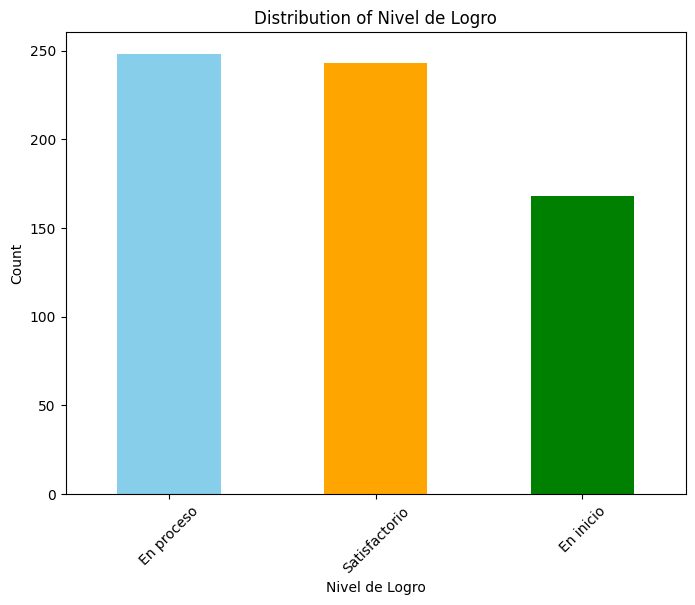

In [255]:
plt.figure(figsize=(8, 6))
target_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Distribution of Nivel de Logro")
plt.xlabel("Nivel de Logro")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [256]:
from sklearn.preprocessing import LabelEncoder

In [257]:
categorical_columns = df.select_dtypes(include=['object']).columns.difference(['Nivel de logro'])

label_encoders = {}  
for col in categorical_columns:
    le = LabelEncoder()
    
    df[col] = df[col].fillna('-1')
    
    df[col] = le.fit_transform(df[col])
    
    label_encoders[col] = le

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   region_ie                                                 659 non-null    int64
 1   provincia_ie                                              659 non-null    int64
 2   ugel_ie                                                   659 non-null    int64
 3   distrito_ie                                               659 non-null    int64
 4   centropoblado_ie                                          659 non-null    int64
 5   codigolocal_ie                                            659 non-null    int64
 6   codigomodular_ie                                          659 non-null    int64
 7   grado                                                     659 non-null    int64
 8   periodo                                 

In [265]:
correlation_matrix = df.drop(['nivel_de_logro'], axis=1).corr()

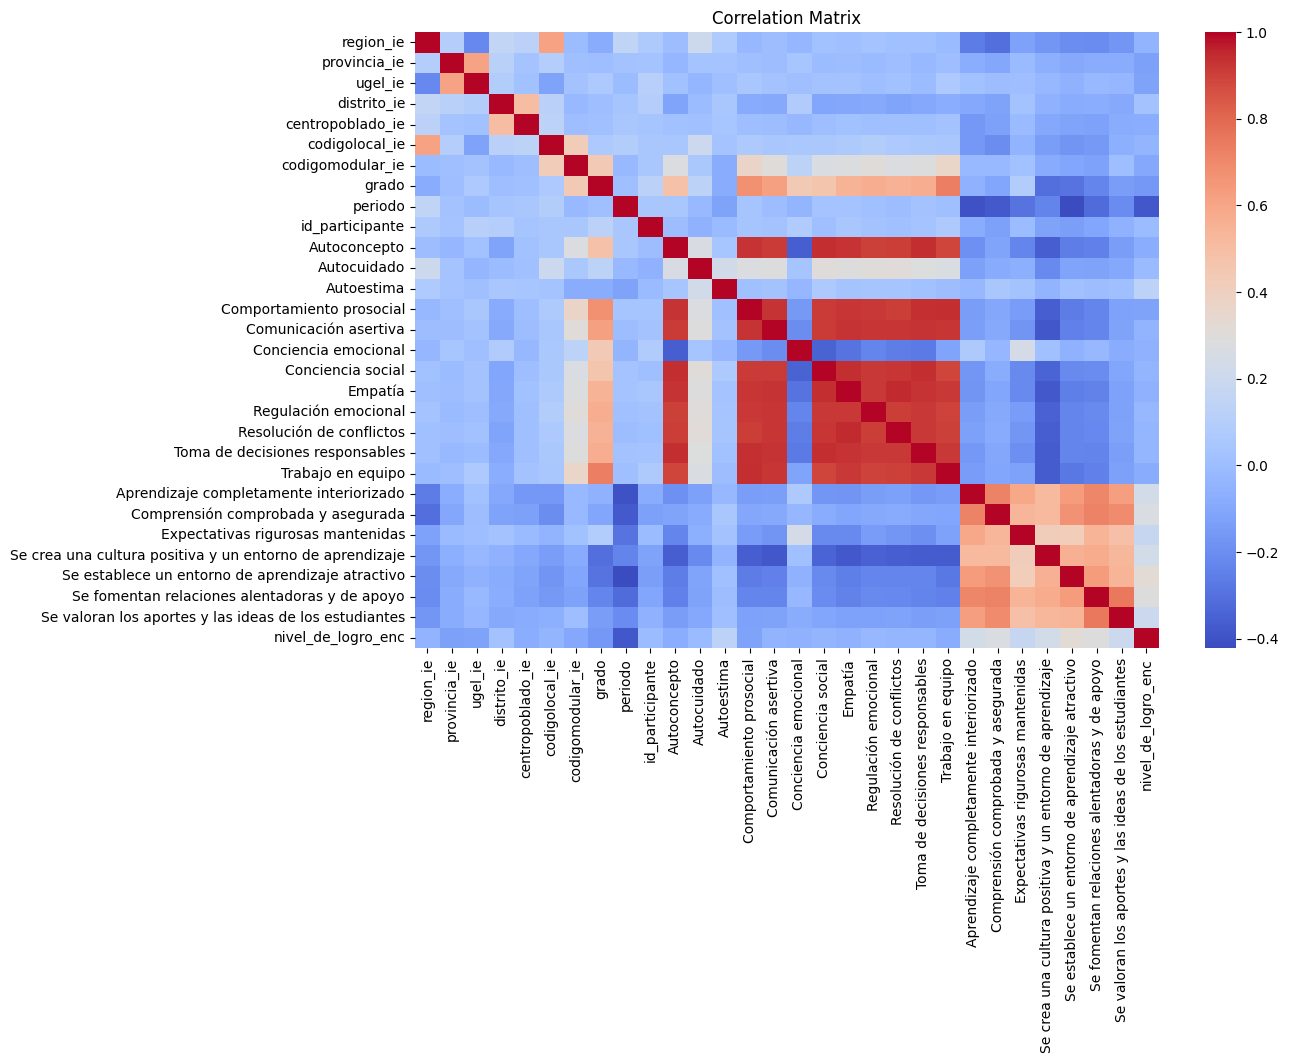

In [267]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()


### Modelling

In [268]:
df.columns

Index(['region_ie', 'provincia_ie', 'ugel_ie', 'distrito_ie',
       'centropoblado_ie', 'codigolocal_ie', 'codigomodular_ie', 'grado',
       'periodo', 'id_participante', 'nivel_de_logro', 'Autoconcepto',
       'Autocuidado', 'Autoestima', 'Comportamiento prosocial',
       'Comunicación asertiva', 'Conciencia emocional', 'Conciencia social',
       'Empatía', 'Regulación emocional', 'Resolución de conflictos',
       'Toma de decisiones responsables', 'Trabajo en equipo',
       'Aprendizaje completamente interiorizado',
       'Comprensión comprobada y asegurada',
       'Expectativas rigurosas mantenidas',
       'Se crea una cultura positiva y un entorno de aprendizaje',
       'Se establece un entorno de aprendizaje atractivo',
       'Se fomentan relaciones alentadoras y de apoyo',
       'Se valoran los aportes y las ideas de los estudiantes',
       'nivel_de_logro_enc'],
      dtype='object')

Por agregar indice de fechas
Eliminar Primary keys de tablas, indices de escuela o region (se podria agrupar por regiones de calor, frio y Lima)
Esperar por la data demografica de alumnos o escuela
Esperar por la historia de 2024

In [50]:
X = df.drop(columns=['Nivel de logro', 'Nivel_de_Logro_Encoded', 'Region_IE', 'Provincia_IE', 'UGEL_IE', 'Distrito_IE', 'CentroPoblado_IE', 'CodigoLocal_IE', 'CodigoModular_IE', 'ID_Participante', 'Fecha'])
y = df['Nivel_de_Logro_Encoded']

In [51]:
y_binary = (y == 2).astype(int)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


In [53]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [54]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6551724137931034
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        63
           1       0.63      0.60      0.62        53

    accuracy                           0.66       116
   macro avg       0.65      0.65      0.65       116
weighted avg       0.65      0.66      0.65       116



### Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
rf_model_tuned = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5, min_samples_split=2)
rf_model_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

### Evaluation

In [57]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [58]:
print("Top Features:")
print(feature_importances.head(20))

Top Features:
                                              Feature  Importance
0                                               Grado    0.170795
30   Se establece un entorno de aprendizaje atractivo    0.050511
17            Percepción sobre estereotipos de género    0.049893
21                                Trabajo adolescente    0.042923
11     Desinformación sobre educación sexual integral    0.038485
19                           Resolución de conflictos    0.038434
3                                         Autocuidado    0.037746
12                                            Empatía    0.035726
18                               Regulación emocional    0.035424
7                                Conciencia emocional    0.035092
1                      Ausentismo y deserción escolar    0.029729
32  Se valoran los aportes y las ideas de los estu...    0.029423
31     Se fomentan relaciones alentadoras y de apoyo.    0.028523
4                                          Autoestima    0.026